In [83]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [93]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
# Read the dataset as a Pandas dataframe in memory
# Note: here, we only read the first 100K rows. Other sampling options are available
dataset_net_savings = dataiku.Dataset("unseen_scored_joined")
df = dataset_net_savings.get_dataframe(limit=100000)

In [95]:
def categorize_prediction(x):
    prediction = x["prediction"]
    fraud = x["fraud"]
    if prediction == 0:
        if fraud == 0:
            return "TN"
        else:
            return "FN"
    else:
        if fraud == 0:
            return "FP"
        else:
            return "TP"

In [96]:
def calculate_savings(x):
    amount = x["amount"]
    cat = x["prediction_category"]
    if cat == "TP":
        return amount
    else:
        return 0

In [97]:
def calculate_loss(x):
    
    amount = x["amount"]
    cat = x["prediction_category"]
    
    if (cat == "TP") or (cat == "FP"):
        return cost
    elif cat == "FN":
        return amount
    else:
        return 0

In [98]:
cost = 50
detection_rate = 0.6

In [99]:
df["prediction_category"]=df.apply(categorize_prediction, axis=1)
df["savings"]=df.apply(calculate_savings, axis=1)

In [67]:
df["loss"]=df.apply(calculate_loss, axis=1)
df["model_net_savings"] = df["savings"] - df["loss"]
df["manual_savings"] = df["amount"] * detection_rate
df["manual_net_savings"] = df["manual_savings"] - cost
total_net_savings = df["model_net_savings"].sum() - df["manual_net_savings"].sum()

In [68]:
total_net_savings

793711.9339999999

In [100]:
df= df.head(200)

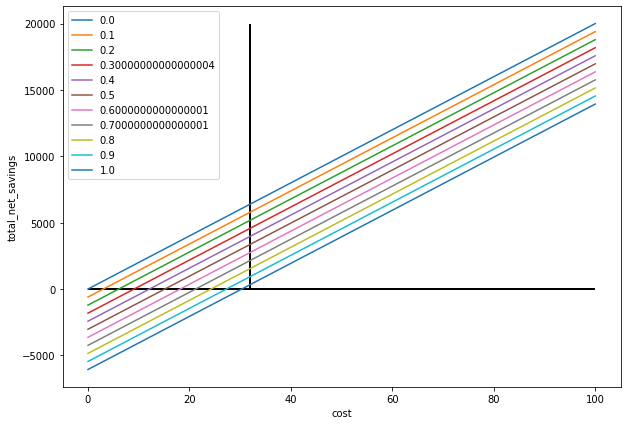

In [105]:
plt.figure(figsize=(10, 7))
detec_rate_list = np.linspace(0, 1, 11)
cost_list = np.linspace(0,100,10)
for detection_rate in detec_rate_list:
    y = []
    for cost in cost_list:
        # df["prediction_category"]=df.apply(categorize_prediction, axis=1)
        # df["savings"]=df.apply(calculate_savings, axis=1)
        df["loss"]=df.apply(calculate_loss, axis=1)
        df["model_net_savings"] = df["savings"] - df["loss"]
        df["manual_savings"] = df["amount"] * detection_rate
        df["manual_net_savings"] = df["manual_savings"] - cost
        total_net_savings = df["model_net_savings"].sum() - df["manual_net_savings"].sum()
        y.append(total_net_savings)
    x = cost_list
    plt.plot(x, y, label = detection_rate)
    plt.xlabel("cost")
    plt.ylabel("total_net_savings")
    plt.hlines(y=0, xmin=0, xmax=100)
    plt.vlines(x=32, ymin=0, ymax=20000)
    plt.legend()
plt.show()